In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Holdout

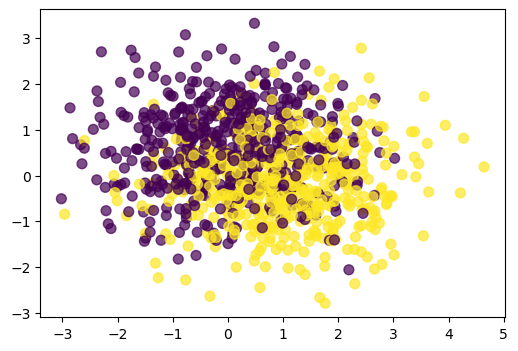

In [2]:
from sklearn import datasets 

plt.figure(figsize=(6,4)) 
n_samples = 1000 
data  = datasets.make_moons(n_samples=n_samples, noise=.9, random_state=42) 
X = data[0] 
y = data[1] 
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7) 
plt.show(True)

In [3]:
d = np.column_stack((X,np.transpose(y)))
data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

In [4]:
print("Nossas classes são:\n", data['y'].value_counts())
data.head(5)

Nossas classes são:
 1.0    500
0.0    500
Name: y, dtype: int64


,X1,X2,y
0,-0.533045,1.052400,1.0
1,1.917080,0.197569,1.0
2,0.289221,1.692251,1.0
3,-1.127344,-1.274772,1.0
4,-0.697656,0.606572,0.0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [6]:
from sklearn.linear_model import LogisticRegression

p = 0.7 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state=42, stratify=y)

model_holdout = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model_holdout.fit(x_train, y_train)

y_pred = model_holdout.predict(x_test)
print('Acurácia: ', model_holdout.score(x_test, y_test))

coefficient = model_holdout.coef_
intercept = model_holdout.intercept_

print("Coeficientes:", coefficient)
print("Intercepto:", intercept)
print(y_pred)

Acurácia:  0.7233333333333334
Coeficientes: [[ 0.93241104 -0.82005755]]
Intercepto: [0.01911021]
[1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0
 0 0 0 1]


Fazendo uma função para calcular a probabilidade de um novo atributo = 1

In [7]:
def prob_predict(x1, x2):
    z = intercept[0] + coefficient[0][0]*x1 + coefficient[0][1]*x2
    return 1/(1+np.exp(-z))

print("No set de test, por exemplo, a chance de y = 1 é dada por:", prob_predict(x_test[:,0], x_test[:,1])[1:5], "e assim por diante")

No set de test, por exemplo, a chance de y = 1 é dada por: [0.91258125 0.57185049 0.27547912 0.04547322] e assim por diante


Veja que as probabilidades acima coincidem com as probabilidades da coluna da direita do vetor abaixo

predict_proba() prediz e retorna duas probabilidades para cada categoria 0 ou 1

In [8]:
y_holdout_predict_prob = model_holdout.predict_proba(x_test)
print("Exemplos: \n", y_holdout_predict_prob[1:5])

Exemplos: 
 [[0.08741875 0.91258125]
 [0.42814951 0.57185049]
 [0.72452088 0.27547912]
 [0.95452678 0.04547322]]


extraindo as probabilidades da categoria 1 para determinar um threshold <br> Supor que nosso threshold é definido como se: probabilidade > 0.6 $\Rightarrow$ classe y = 1 no exemplo fictício.

In [9]:
y_class_1_prob = y_holdout_predict_prob[:,1]
y_predict_class = [1 if prob > 0.6 else 0 for prob in y_class_1_prob ]

Avaliando performance com nosso novo threshold definido <br> Veja que se trocássemos o valor do threshold para 0.5, a acurácia obtida seria exatamente a mesma obtida anteriormente pela função .score()

In [10]:
print("Accuracy:", accuracy_score(y_test, y_predict_class))

Accuracy: 0.7366666666666667


Visualizando as regiões de separação pela regressão logística

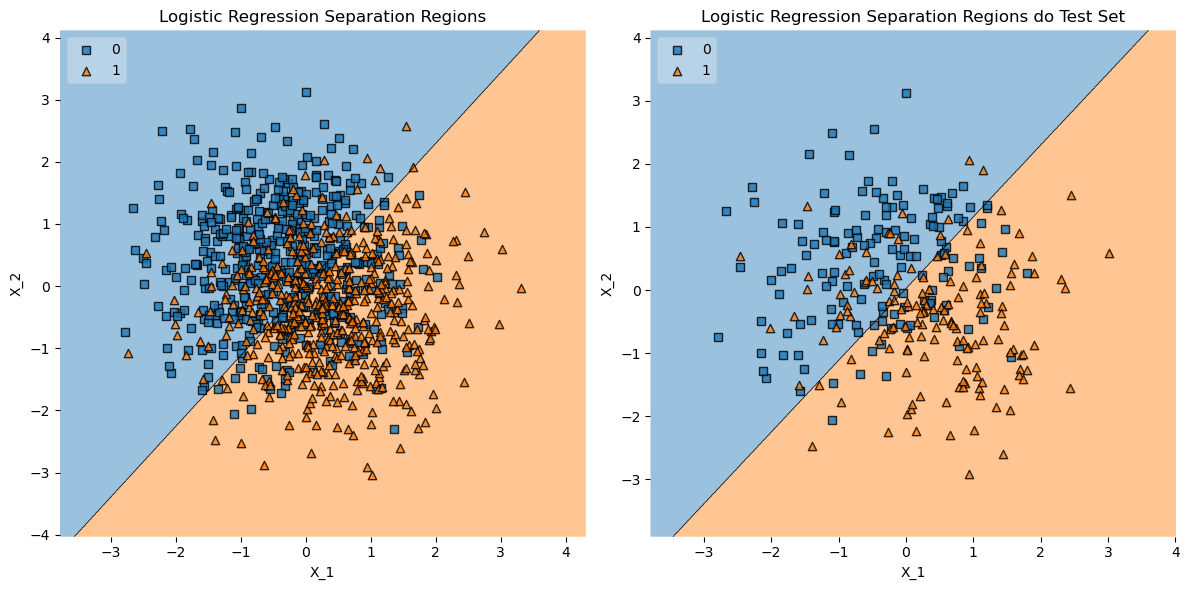

In [11]:
from mlxtend.plotting import plot_decision_regions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_decision_regions(X, y, clf=model_holdout, ax=ax1, legend=2)
ax1.set_title('Logistic Regression Separation Regions')
ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')

plot_decision_regions(x_test, y_test, clf=model_holdout, ax=ax2, legend=2)
ax2.set_title('Logistic Regression Separation Regions do Test Set')
ax2.set_xlabel('X_1')
ax2.set_ylabel('X_2')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

[[105  45]
 [ 38 112]] 

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       150
           1       0.71      0.75      0.73       150

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [13]:
import plotly.graph_objs as go

#coef = model_holdout.coef_[0]
#intercept = model_holdout.intercept_

x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
z = prob_predict(x1, x2)

fig = go.Figure()

fig.add_trace(go.Surface(x=x1, y=x2, z=z, showscale=False, opacity=0.7, colorscale='Viridis'))


fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', 
                           marker=dict(color=y, colorscale='Viridis', size=5, symbol='circle')))

fig.update_layout(scene=dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Probability'),
                  title='Regressão Logística com 2 features',
                  width=1000,
                  height=500)
fig.show()

## Cross-Validation

In [14]:
data_iris = pd.read_csv("data01/iris.csv")
data_iris = data_iris.drop_duplicates()
data_vehicle = pd.read_csv("data01/Vehicle.csv")

In [15]:
classes_iris = np.array(pd.unique(data_iris[data_iris.columns[-1]]), dtype='str')
classes_vehicle = np.array(pd.unique(data_vehicle[data_vehicle.columns[-1]]), dtype='str')

data_iris_np = data_iris.to_numpy()
y_iris = data_iris_np[:,-1]
x_iris = data_iris_np[:,0:data_iris_np.shape[1]-1]

data_vehicle_np = data_vehicle.to_numpy()
y_vehicle = data_vehicle_np[:,-1]
x_vehicle = data_vehicle_np[:,0:data_vehicle_np.shape[1]-1]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score


scaler_iris = StandardScaler().fit(x_iris)
x_iris = scaler_iris.transform(x_iris)

scaler_vehicle = StandardScaler().fit(x_vehicle)
x_vehicle = scaler_vehicle.transform(x_vehicle)

In [2]:
from IPython.display import display, HTML

html_content = """
<div style="font-family: Arial, sans-serif; line-height: 1.6;">
    <h2 style="color: #2E86C1;">Understanding Differences in Cross-Validation Scores Between lbfgs and newton-cholesky Solvers</h2>
    
    <h3 style="color: #2980B9;">1. Multinomial vs. One-vs-Rest (OvR) Approach:</h3>
    <p>
        <b>lbfgs (Multinomial Logistic Regression):</b><br>
        When using <code>lbfgs</code> with <code>multi_class='auto'</code>, which defaults to <code>multi_class='multinomial'</code> when the number of classes is more than two, the solver treats the multiclass problem as a single optimization problem.
        <br>
        In multinomial logistic regression, the objective function is optimized for all classes simultaneously. This means that the model tries to find the best set of coefficients that work well for all classes as a whole. As a result, the cross-validation scores tend to be similar or even identical across all classes, because the optimization considers the performance on all classes together.
        <br>
        This is why you observed the same mean cross-validation accuracy for all classes when using <code>lbfgs</code>. The scores reflect the overall model performance rather than class-specific nuances.
    </p>
    <p>
        <b>newton-cholesky (More Precise Optimization):</b><br>
        When using <code>newton-cholesky</code>, even though it also supports multinomial logistic regression, the more precise optimization of the Hessian matrix can lead to differences in how the model fits each class, especially in cases where the decision boundaries between classes are more complex or when the data isn't perfectly balanced across classes.
        <br>
        The <code>newton-cholesky</code> solver can better capture these differences, leading to more varied cross-validation scores across classes. For example, if the solver finds that one class is harder to separate from others, it might show a lower cross-validation score for that class, reflecting the true difficulty of the classification problem.
    </p>
    
    <h3 style="color: #2980B9;">2. Model Sensitivity and Class Imbalance:</h3>
    <p>
        In many classification problems, some classes may be more difficult to distinguish than others due to class imbalance, feature overlap, or other factors. A more precise solver like <code>newton-cholesky</code> can pick up on these nuances, leading to different performance metrics for each class.
        <br>
        For instance, in your results, the <code>newton-cholesky</code> solver shows a significantly lower accuracy for the <code>versicolor</code> class (0.6983) compared to the other classes. This suggests that the model might be having more difficulty correctly classifying <code>versicolor</code> instances, which could be due to overlapping features with other classes or an imbalance in the data distribution.
        <br>
        The <code>lbfgs</code> solver, on the other hand, might smooth over these differences because it's optimizing for all classes at once, resulting in more uniform scores.
    </p>
    
    <h3 style="color: #2980B9;">3. Convergence and Precision:</h3>
    <p>
        <b>lbfgs:</b><br>
        As a quasi-Newton method that approximates the Hessian, <code>lbfgs</code> may not capture all the subtleties in the decision boundaries, particularly if the data is complex or nearly linearly separable. This could lead to similar scores across classes as the solver finds a compromise that works "well enough" for all classes, but doesn't necessarily capture the hardest distinctions.
    </p>
    <p>
        <b>newton-cholesky:</b><br>
        By directly computing and factorizing the Hessian matrix, <code>newton-cholesky</code> provides more precise optimization. This precision can result in more accurate reflections of the true difficulty of the classification task for each class, which can lead to different scores for each class. The solver is better able to differentiate between easy and hard-to-classify instances, resulting in varied cross-validation accuracies.
    </p>
    
    <h3 style="color: #2980B9;">4. Summary:</h3>
    <p>
        <b>Equal Scores with lbfgs:</b> The identical cross-validation scores across all classes using <code>lbfgs</code> are likely due to the multinomial logistic regression approach, where the optimization process focuses on the overall performance across all classes, smoothing out differences between them.
        <br>
        <b>Different Scores with newton-cholesky:</b> The varied scores with <code>newton-cholesky</code> suggest that this solver is more sensitive to class-specific performance, revealing the varying difficulty of classifying different classes in your dataset. The more precise optimization process captures the nuances of the classification problem better, leading to different accuracies for each class.
    </p>
</div>
"""
display(HTML(html_content))


Se estivermos interessados apenas nas acurácias dos modelos:

In [18]:
logreg = LogisticRegression()
cvtest = cross_validate(logreg, x_iris, y_iris, cv = 5)
fitted = logreg.fit(x_iris, y_iris)

print(cvtest['test_score'].mean())
print(cvtest['test_score'])


0.9521839080459771
[0.96666667 0.96666667 0.93103448 0.89655172 1.        ]


In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logistic_iris_class = LogisticRegressionCV(solver = 'newton-cg', multi_class = 'auto', max_iter = 1000, cv = 5)
model_iris_cv = logistic_iris_class.fit(x_iris, y_iris)

print(model_iris_cv.coef_, "\n")
print(model_iris_cv.intercept_, "\n")
print(model_iris_cv.classes_, "\n")

accuracy = model_iris_cv.score(x_iris, y_iris)
print("Accuracy:", accuracy)

mean_scores = []
scores_dict = model_iris_cv.scores_
for class_label, scores in scores_dict.items():
    mean_score = scores.mean()
    print(f"Mean CV accuracy for class {class_label}: {mean_score:.4f}")


[[-1.82629618  2.100767   -4.29139537 -4.02689546]
 [ 1.49541395 -0.33033522 -1.98532931 -1.63973252]
 [ 0.33088223 -1.77043178  6.27672469  5.66662797]] 

[ 0.13407463  4.85132321 -4.98539785] 

['setosa' 'versicolor' 'virginica'] 

Accuracy: 0.9795918367346939
Mean CV accuracy for class setosa: 0.8748
Mean CV accuracy for class versicolor: 0.8748
Mean CV accuracy for class virginica: 0.8748


In [20]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logistic_vehicle_class = LogisticRegressionCV(solver = 'newton-cholesky', multi_class = 'auto', max_iter = 1000, cv = 5)
model_vehicle_cv = logistic_vehicle_class.fit(x_vehicle, y_vehicle)

print(model_vehicle_cv.C_, "\n")
print(model_vehicle_cv.intercept_, "\n")

accuracy = model_vehicle_cv.score(x_vehicle, y_vehicle)
print("Accuracy:", accuracy)

mean_scores = []
scores_dict = model_vehicle_cv.scores_
for class_label, scores in scores_dict.items():
    mean_score = scores.mean()
    print(f"Mean CV accuracy for class {class_label}: {mean_score:.4f}")


[2.15443469e+01 2.78255940e+00 3.59381366e-01 1.00000000e+04] 

[ -3.92001608  -1.77658455  -1.54120824 -11.79233124] 

Accuracy: 0.8144208037825059
Mean CV accuracy for class bus: 0.8921
Mean CV accuracy for class opel: 0.7760
Mean CV accuracy for class saab: 0.7867
Mean CV accuracy for class van: 0.9058


## StratifiedKfold 

In [21]:
data = pd.read_csv("data01/winequality-red.csv")

In [22]:
data = data.drop_duplicates()
data.shape

(1359, 12)

In [23]:
data.iloc[:,-1].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [24]:
classes_wine = np.array(pd.unique(data[data.columns[-1]]), dtype='str')

In [25]:
data_np = data.to_numpy()
y = data_np[:,-1]
x = data_np[:,0:data_np.shape[1]-1]

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score


scaler = StandardScaler().fit(x)
x = scaler.transform(x)

### Usando GridSearchCV para achar melhor 'solver' e melhore score por validação cruzada

param_grid: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']

In [27]:
param_grid = {'solver': ['newton-cholesky', 'saga', 'lbfgs', 'newton-cg', 'sag', 'liblinear']}
grid_search = GridSearchCV(LogisticRegression(multi_class = 'auto', max_iter = 1000), param_grid, cv=5)
fitted = grid_search.fit(x, y)

best_stuff = fitted.best_params_['solver']
print("Best solver:", best_stuff)
print("Best cross-validation score:", fitted.best_score_)
print("Best estimator:", fitted.best_estimator_)

Best solver: saga
Best cross-validation score: 0.5754476883004125
Best estimator: LogisticRegression(max_iter=1000, solver='saga')


Salvando o modelo com melhores parâmetros com o GridSearchCV

In [28]:
import joblib

joblib.dump(fitted.best_estimator_, 'best_estimator.pkl')
best_model = joblib.load('best_estimator.pkl')

In [29]:
coefficients = best_model.coef_  
intercept = best_model.intercept_

print('## Classes \n', best_model.classes_, "\n")

print("## Coefficients for Each Class\n")
for i in range(6):
    print(f"Coefficients for Class {i + 1}:")
    coef_list = ', '.join([f'{coeff:.4f}' for coeff in coefficients[i]])
    print(f"[{coef_list}]")

print("\n## Intercepts for Each Class\n")
intercept_list = ', '.join([f'{inter:.4f}' for inter in intercept])
print(f"[{intercept_list}]")

## Classes 
 [3. 4. 5. 6. 7. 8.] 

## Coefficients for Each Class

Coefficients for Class 1:
[0.3804, 1.1384, 0.2035, -0.0784, 0.7120, 0.3398, -0.8746, 0.6214, 0.7676, -0.6098, -1.0715]
Coefficients for Class 2:
[0.2878, 0.4622, -0.0111, 0.2781, 0.2378, -0.3598, 0.2193, -0.4793, 0.4155, -0.2810, -0.6690]
Coefficients for Class 3:
[-0.4224, -0.0136, -0.0732, -0.2073, 0.1400, -0.1313, 0.7556, 0.2978, -0.2222, -0.3695, -0.5913]
Coefficients for Class 4:
[-0.2467, -0.4596, -0.2213, -0.1582, 0.0034, 0.0609, 0.2287, 0.2331, -0.1787, -0.0016, 0.2612]
Coefficients for Class 5:
[0.3365, -0.8942, -0.2278, 0.1710, -0.2342, -0.0002, 0.0270, -0.2960, -0.0518, 0.4991, 0.7508]
Coefficients for Class 6:
[-0.3355, -0.2332, 0.3300, -0.0052, -0.8591, 0.0907, -0.3561, -0.3770, -0.7305, 0.7627, 1.3198]

## Intercepts for Each Class

[-3.3690, 0.0056, 2.6309, 2.7745, 0.6537, -2.6957]


Making the Predictions

In [30]:
x_new = np.array([[8.6, 0.42, 0.39, 1.8, 0.068, 6.0, 12.0, 0.99516, 3.35, 0.69, 11.7]])
scaler = StandardScaler().fit(x_new)
x_new = scaler.transform(x_new)

y_pred_new = best_model.predict(x_new)
print("Predicted probabilities:", y_pred_new)

y_pred_proba = best_model.predict_proba(x_new)
print("Predicted class probabilities:", y_pred_proba)

Predicted probabilities: [6.]
Predicted class probabilities: [[0.00104479 0.03052159 0.42148303 0.48654843 0.05835362 0.00204855]]


| **Aspect**                  | **One-vs-Rest (OvR)**                                        | **Multinomial (Softmax)**                                   |
|-----------------------------|--------------------------------------------------------------|-------------------------------------------------------------|
| **Number of models**         | `C` separate binary logistic regression models               | One single model with `C` outputs                           |
| **Training**                 | Each class is trained as a binary classifier (class vs rest) | A single model trained to directly predict multiple classes |
| **Prediction**               | The class with the highest probability across binary models  | The class with the highest softmax probability              |
| **Output**                   | `C` binary probabilities (one for each model)               | `C` probabilities via the softmax function                  |
| **Solvers Supported**        | Can use `liblinear` and `saga` solvers                       | `lbfgs`, `newton-cg`, `sag`, `saga` (solvers for softmax)   |

### StratifiedKfold

 StratifiedKFold using cross_validate

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

model_cv = LogisticRegression(solver='saga', multi_class='auto', max_iter=1000)
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv = cross_validate(model_cv, x, y, cv=strat_kfold)

print("Accuracy of each fold:", cv['test_score'])
print("Mean accuracy using Cross Validation:", cv['test_score'].mean())

Accuracy of each fold: [0.55882353 0.56617647 0.61029412 0.64705882 0.53676471 0.55147059
 0.61764706 0.55882353 0.59558824 0.62962963]
Mean accuracy using Cross Validation: 0.5872276688453159


Stratified K fold suing GridSearch

encontrando melhor número de folds

In [32]:
accuracy = {}

for split in range(2, 11):
    param_grid = {'solver': ['saga']}
    strat_kfold = StratifiedKFold(n_splits=split, shuffle=True, random_state=42)
    grid_search = GridSearchCV(LogisticRegression(multi_class = 'auto', max_iter = 1000), param_grid, cv=strat_kfold)
    fitted_new = grid_search.fit(x, y)
    scores = fitted_new.best_score_
    accuracy[split] = scores

In [33]:
print(accuracy)

{2: 0.5754244996967859, 3: 0.5827814569536424, 4: 0.5857409335415582, 5: 0.58353592359453, 6: 0.5879497875326497, 7: 0.5850232241984819, 8: 0.5850330664810303, 9: 0.5857247976453274, 10: 0.5872276688453159}


Melhor modelo possível

In [36]:
param_grid = {'solver': ['saga']}
strat_kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
grid_search = GridSearchCV(LogisticRegression(multi_class = 'auto', max_iter = 1000), param_grid, cv=strat_kfold)
fitted_new = grid_search.fit(x, y)

print("Best cross-validation score:", fitted_new.best_score_)

Best cross-validation score: 0.5879497875326497


In [37]:
import joblib

joblib.dump(fitted_new.best_estimator_, 'best_new_estimator.pkl')
best_model_new = joblib.load('best_new_estimator.pkl')

Predicting

In [38]:
x_new = np.array([[8.6, 0.42, 0.39, 1.8, 0.068, 6.0, 12.0, 0.99516, 3.35, 0.69, 11.7]])
scaler = StandardScaler().fit(x_new)
x_new = scaler.transform(x_new)

y_pred_new = best_model_new.predict(x_new)
print("Predicted class:", y_pred_new)

y_pred_proba = best_model_new.predict_proba(x_new)
print("Predicted class probabilities:", y_pred_proba)

print(best_model_new.coef_)

Predicted class: [6.]
Predicted class probabilities: [[0.0010448  0.03052155 0.42148302 0.48654845 0.05835362 0.00204855]]
[[ 3.80491959e-01  1.13834621e+00  2.03447879e-01 -7.83383084e-02
   7.12022564e-01  3.39752654e-01 -8.74543210e-01  6.21305190e-01
   7.67678145e-01 -6.09760037e-01 -1.07155671e+00]
 [ 2.87767282e-01  4.62239760e-01 -1.10940151e-02  2.78084418e-01
   2.37841301e-01 -3.59795005e-01  2.19331552e-01 -4.79306480e-01
   4.15530448e-01 -2.80968882e-01 -6.68987186e-01]
 [-4.22459269e-01 -1.35648000e-02 -7.32173568e-02 -2.07319281e-01
   1.40003904e-01 -1.31308745e-01  7.55609132e-01  2.97805578e-01
  -2.22208029e-01 -3.69453798e-01 -5.91267576e-01]
 [-2.46716064e-01 -4.59578221e-01 -2.21320173e-01 -1.58222117e-01
   3.44353975e-03  6.08740383e-02  2.28673110e-01  2.33073398e-01
  -1.78659938e-01 -1.60421955e-03  2.61186026e-01]
 [ 3.36452518e-01 -8.94207770e-01 -2.27807220e-01  1.71014406e-01
  -2.34211371e-01 -1.92291601e-04  2.70143828e-02 -2.95960758e-01
  -5.18524230